In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [53]:
# Загрузка датасета
file_path = "../data/raw/flats_moscow.csv"
df = pd.read_csv(file_path)

In [54]:
# 1. Просмотр первых строк датасета
print("Первые 5 строк:")
display(df.head())

Первые 5 строк:


,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [55]:
# 2. Проверка информации о данных
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


In [56]:
df= df.drop('Unnamed: 0', axis = 1)
df


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,81,58,40,6.0,12.5,7,1,1,1,3
1,75,44,28,6.0,13.5,7,1,0,1,6
2,128,70,42,6.0,14.5,3,1,1,1,3
3,95,61,37,6.0,13.5,7,1,0,1,1
4,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...
2035,110,77,45,10.0,12.0,5,0,0,1,5
2036,95,60,43,6.0,9.0,5,0,0,1,4
2037,95,60,46,5.0,10.5,5,1,0,1,7
2038,129,76,48,10.0,12.5,5,0,0,1,3


In [57]:
# 3. Проверка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Количество пропущенных значений:
price       0
totsp       0
livesp      0
kitsp       0
dist        0
metrdist    0
walk        0
brick       0
floor       0
code        0
dtype: int64


In [58]:
# 4. Статистическое описание данных
print("\nСтатистическое описание данных:")
display(df.describe())


Статистическое описание данных:


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


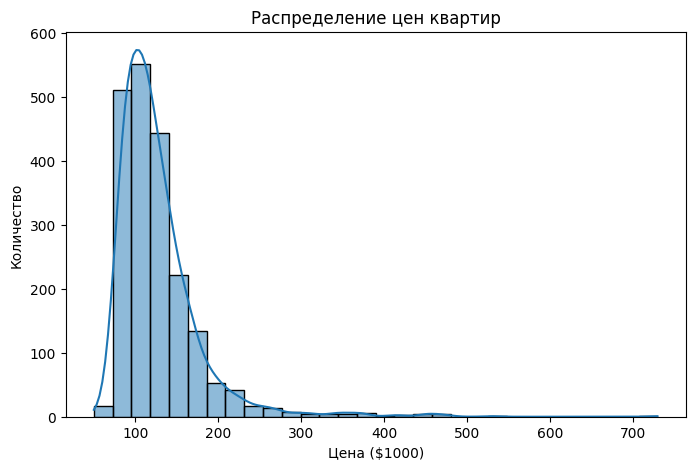

In [59]:
# 5. Построение распределения целевой переменной (цены квартир)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Распределение цен квартир")
plt.xlabel("Цена ($1000)")
plt.ylabel("Количество")
plt.show()

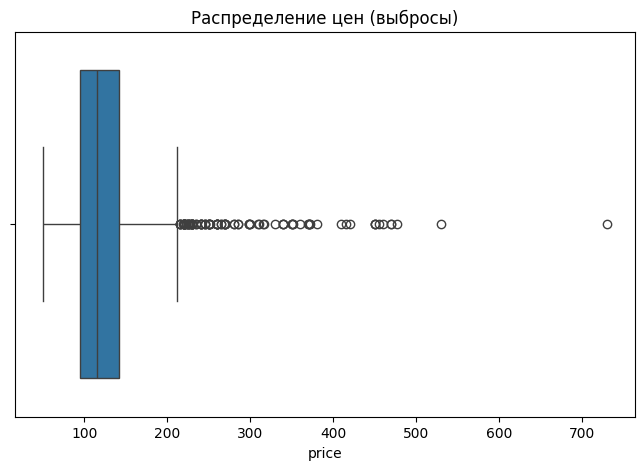

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Распределение цен (выбросы)")
plt.show()

In [61]:
Q1 = df["price"].quantile(0.25)  # 25-й перцентиль
Q3 = df["price"].quantile(0.75)  # 75-й перцентиль
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR  # Нижняя граница выбросов
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница выбросов

print(f"Границы выбросов: {lower_bound} - {upper_bound}")
print(f"Количество выбросов: {df[(df['price'] < lower_bound) | (df['price'] > upper_bound)].shape[0]}")

Границы выбросов: 24.5 - 212.5
Количество выбросов: 98


In [62]:
#import numpy as np
#df["log_price"] = np.log(df["price"])

In [63]:
#plt.figure(figsize=(8, 5))
#sns.histplot(df["log_price"], bins=30, kde=True)
#plt.title("Распределение log(цены)")
#plt.xlabel("log(цены)")
#plt.ylabel("Частота")
#plt.show()

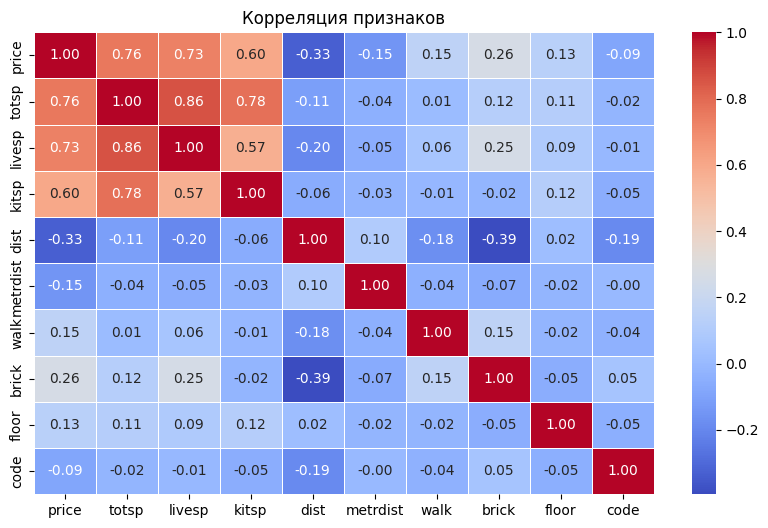

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляция признаков")
plt.show()

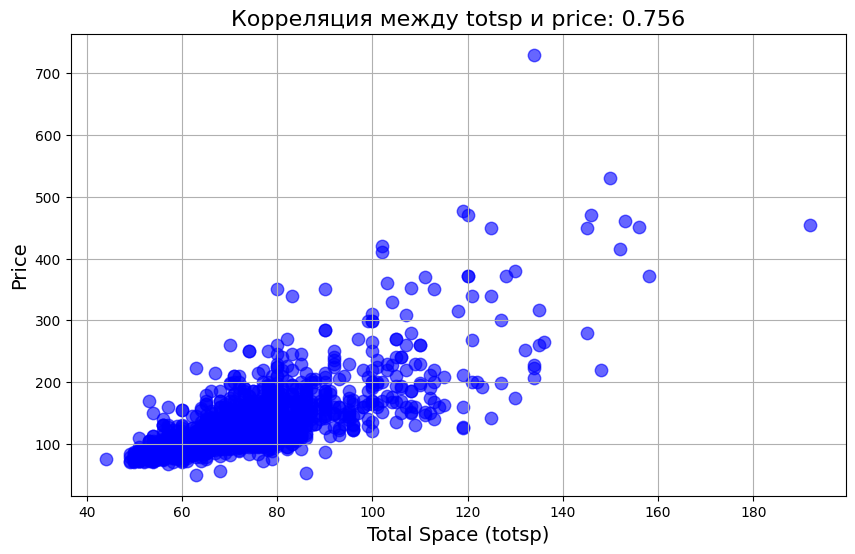

In [65]:
rn_tgt_corr=round(df['totsp'].corr(df['price']), 3)
plt.figure(figsize=(10, 6))
plt.scatter(x=df['totsp'], y=df['price'], alpha=0.6, s=80, color='blue')
plt.title(f'Корреляция между totsp и price: {rn_tgt_corr}', fontsize=16)
plt.xlabel('Total Space (totsp)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()


In [66]:
y = df.price
X = df.drop(columns= ['price'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
regr= LinearRegression()
multiple_lr = regr.fit(x_train, y_train)
multiple_lr_coeffs = multiple_lr.coef_
print ('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test) )
print( 'Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Training data r-squared: 0.6828848573506966
Test data r-squared: 0.679314294648578
Intercept -28.16638781693841


,coef
totsp,1.593820
livesp,1.426083
kitsp,1.700464
dist,-3.044425
metrdist,-1.259431
walk,10.115134
brick,6.180242
floor,6.539393
code,-2.788006


In [68]:
# определение нужны ли все параметры с помощью p-value
x_incl_const = sm.add_constant (x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
#results. params #results-pvalues
pd.DataFrame({ 'coef': results.params, 'p-value': round(results.pvalues, 3)})


,coef,p-value
const,-28.166388,0.000
totsp,1.593820,0.000
livesp,1.426083,0.000
kitsp,1.700464,0.000
dist,-3.044425,0.000
metrdist,-1.259431,0.000
walk,10.115134,0.000
brick,6.180242,0.001
floor,6.539393,0.000
code,-2.788006,0.000


In [69]:
# мультиколлинеарность

variance_inflation_factor (exog=x_incl_const.values, exog_idx=1)

vif = [variance_inflation_factor (exog=x_incl_const.values,
exog_idx=i) for i in range(x_incl_const.shape[1]) ]
pd.DataFrame ({' coef_name': x_incl_const.columns, 'vif': np.around (vif, 2)})

,coef_name,vif
0,const,78.44
1,totsp,7.37
2,livesp,4.55
3,kitsp,2.88
4,dist,1.28
5,metrdist,1.02
6,walk,1.05
7,brick,1.29
8,floor,1.02
9,code,1.05


In [70]:
regr.predict(x_test)

array([250.63941568, 217.66283239,  75.16231384, 175.55801416,
       123.44276638, 101.11399955, 167.55455094, 115.99912979,
       111.45229842,  98.22084035, 109.26420611, 110.40505856,
       115.20017142,  83.88872101,  71.00320708, 103.82403238,
        93.65373997, 104.09856222, 179.61251263, 153.13469988,
       105.98136721, 126.95762025, 100.47008461, 132.82458116,
       104.5491557 , 117.23075584, 153.16107493, 241.17294495,
       121.97781682, 270.52440481, 131.30915709, 129.4975306 ,
       124.47402735, 131.08843718, 120.31150251, 123.44446845,
       111.42221201, 227.16311768, 126.27878852,  96.59688647,
       197.21347732, 142.36366868,  81.71777845, 136.9775368 ,
       161.24038308, 148.65612544, 119.79686405, 109.97448197,
        52.31152112, 124.87653901, 130.04135503, 185.28185044,
       197.39132434, 117.38892   , 137.59110228, 101.87139177,
       132.87576155, 148.32759877,  74.6461594 , 153.58607557,
        93.94734997, 101.74178384, 263.99548108, 129.56

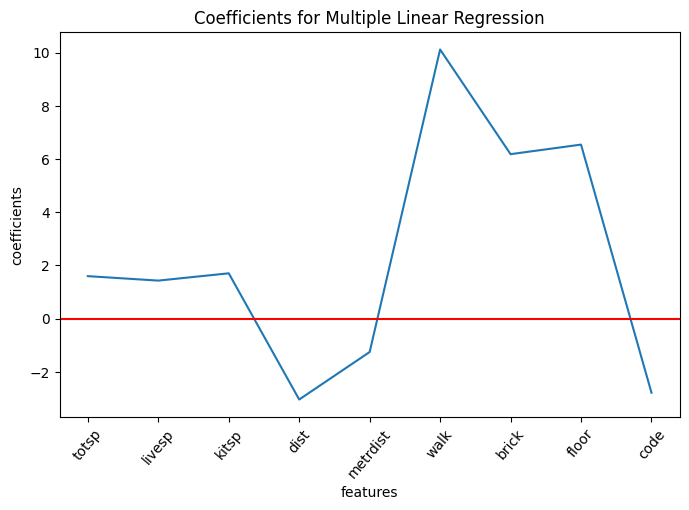

In [71]:
feature_names = x_train.columns


plt.figure(figsize=(8, 5))
plt.plot(range(len(multiple_lr_coeffs)), multiple_lr_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()


In [72]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(multiple_lr,
                     x_train,
                     y_train,
                     scoring='neg_mean_squared_error',
                     cv=10)

mse.mean()

np.float64(-889.7276542135921)

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

print('Лучшее значение alpha:', ridge.fit(x_train,y_train).best_params_)
print('Метрика качества:', ridge.fit(x_train,y_train).best_score_)


Лучшее значение alpha: {'alpha': 20}
Метрика качества: -889.5798160226644


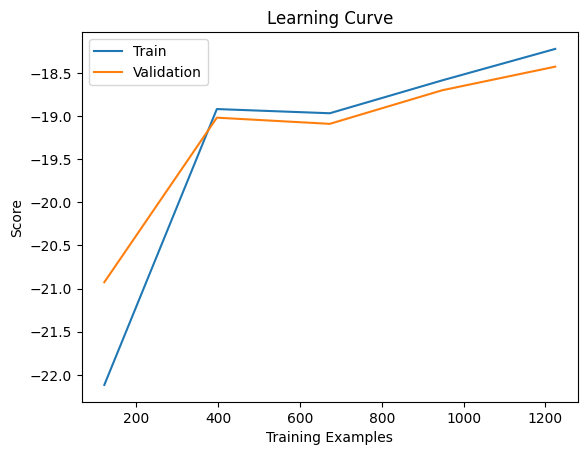

In [74]:
import numpy as np
from sklearn.model_selection import cross_val_score, learning_curve
alpha_values = [10 ** i for i in range(-10, 10)] + [0.1, 0.5, 1, 5, 10, 20 , 30 ,50 ,100]

ridge = Ridge(random_state = 666)
parameters = {'alpha' : alpha_values}
ridgeGS_mae = GridSearchCV(ridge, parameters, scoring = 'neg_mean_absolute_error', cv = 4)
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ridgeGS_mae, x_train, y_train, cv=4)
# Plot learning curve
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


In [75]:
df["predicted_price"]= regr.predict(X)
df[["price", "predicted_price"]].head()

,price,predicted_price
0,81,99.120696
1,75,42.105533
2,128,120.047578
3,95,95.975252
4,330,205.434119


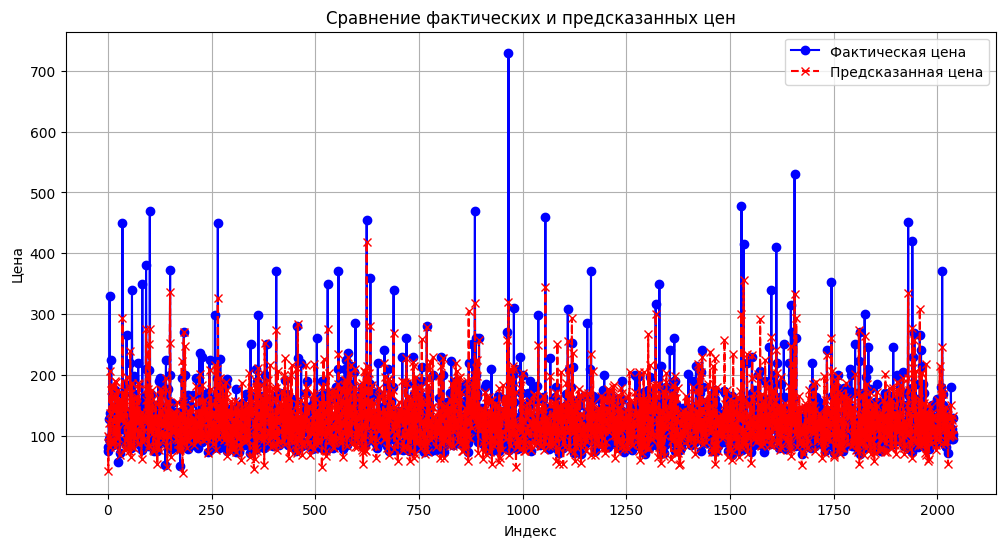

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(df["price"], label='Фактическая цена', color='blue', marker='o', linestyle='-')
plt.plot(df["predicted_price"], label='Предсказанная цена', color='red', marker='x', linestyle='--')
plt.title('Сравнение фактических и предсказанных цен')
plt.xlabel('Индекс')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

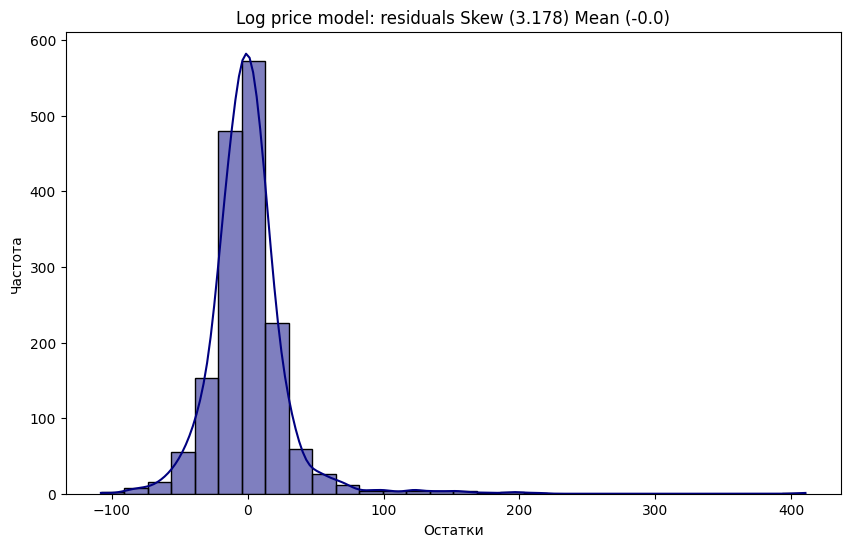

In [77]:
resid_mean=round (results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
plt.figure(figsize=(10, 6))
sns.histplot(results.resid, color='navy', kde=True, bins=30)
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()